# <center><a href='https://mybinder.org/v2/gh/fortierq/binder-mp2i/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fmp2i-fsm%252Fmp2i-2021%26urlpath%3Dlab%252Ftree%252Fmp2i-2021%252F1_ocaml%252Ftp%252Ftp2.ipynb%26branch%3Dmain'>TP 2 : Récursivité et conditions                                           <img src=https://mybinder.org/badge.svg></a></center>

Dans tout le TP, il est interdit d'utiliser des boucles (pas de `for` ni `while`).

Rappel : pensez à tester toutes vos fonctions sur des exemples.

## Petites questions

1. Définir une fonction `divise` telle que `divise a b` renvoie `true` si  `a` divise `b`, `false` sinon. Il est interdit d'utiliser `if`.
2. Définir une fonction récursive `somme` telle que `somme n` renvoie $\sum_{k=1}^n k^2$.
3. Définir une fonction récursive `u` telle que `u n` renvoie $u_n$ définie par :
$$u_0 = 42$$
$$u_{n} = 3\sqrt{u_{n - 1}} + 2$$
4. Définir une fonction récursive `v` telle que `v a n` renvoie $v_n$ définie par (on fera attention à n'utiliser qu'un appel récursif) :
$$v_0 = a$$
$$v_{n + 1} = \frac{1}{2}(v_n + \frac{a}{v_n})$$
5. Calculer `v a n` pour plusieurs valeurs de `a` et de `n` : que peut-on conjecturer sur la limite de $v_n$ ? Optionnel : le démontrer.  
6. Soient $a$ et $b$ deux entiers et $q, r$ le quotient et reste de la division euclidienne de $a$ par $b$ ($a = bq + r$). En utilisant le fait que $PGCD(a, b)$ = $PGCD(b, r)$, écrire une fonction `euclide` telle que `euclide a b` renvoie le PGCD de $a$ et $b$.

In [1]:
(* ici j'utilise assert pour tester les fonctions et let () = ... pour éviter d'afficher des unit partout *)

(* 1. *)
let divise a b =
    b mod a = 0;;
let () = assert (divise 14 42 && not (divise 3 7));;

(* 2. *)
let rec somme n = 
    if n = 0 then 0
    else n*n + somme (n - 1);;
let () = assert (somme 3 = 1 + 4 + 9)

(* 3. *)
let rec u n =
    if n = 0 then 42. (* doit renvoyer un float à cause de la racine *)
    else 3.*.(u (n - 1))**0.5 +. 2.;;
    
(* 4. *)
let rec u a n =
    if n = 0 then a
    else let un = u a (n - 1) in
    (un +. a/.un)/.2.;;
u 9. 5;;
u 25. 5;;

(* 5 *)
(* la limite de u a est racine de a (il s'agit de la suite de Héron) *)

(* 6 *)
let rec euclide a b = 
    if b = 0 then a  (* le PGCD est le dernier reste non nul *)
    else euclide b (a mod b);; (* formule de l'énoncé *)
let () = assert (euclide 21 6 = 3)

val divise : int -> int -> bool = <fun>


val somme : int -> int = <fun>


val u : int -> float = <fun>


val u : float -> int -> float = <fun>


- : float = 3.00000000139698386


- : float = 5.00002317825394904


val euclide : int -> int -> int = <fun>


## Exponentiation rapide

1. Écrire une fonction récursive `puissance` naïve (c'est à dire très simple) telle que `puissance a n` renvoie $a^n$. Combien effectue t-elle de multiplications (en fonction de n) ?
2. Écrire une fonction récursive `exp_rapide` pour calculer $a^n$, en utilisant les relations suivantes :
$$ 
\begin{cases} 
a^n = (a^{\frac{n}{2}})^2 ~~~~~~~~~\text{si }n\text{ est pair}\\
a^{n} = a \times (a^{\frac{n-1}{2}})^2 ~~~~~\text{sinon}
\end{cases}
$$
**Attention** : pour mettre au carré, utiliser une variable plutôt que faire 2 appels récursifs, ce qui augmenterait beaucoup le nombre d'opérations.  
**Remarque** : On montrera plus tard que cette 2ème version demande de l'ordre de $\ln(n)$ multiplications seulement.

In [2]:
(* 1. *)
let rec puissance a n =
    if n = 0 then 1
    else a * puissance a (n - 1);;
let () = assert (puissance 2 10 = 1024);;
(* puissance a n effectue autant de multiplication que d'appels récursifs, c'est à dire n - 1 *)

(* 2. *)
let rec exp_rapide a n =
    if n = 0 then 1
    else let b = exp_rapide a (n/2) in (* pour éviter de faire 2 appels récursifs *)
    if n mod 2 = 0 then b*b
    else a*b*b;; (* si n est impair, n/2 et (n - 1)/2 ont la même valeur en OCaml donc on peut utiliser b aussi *)
let () = assert (exp_rapide 2 10 = 1024);;
exp_rapide 2 10 = 1024

val puissance : int -> int -> int = <fun>


val exp_rapide : int -> int -> int = <fun>


- : bool = true


# Accumulateur

On a vu dans le cours sur la récursivité (avec l'exemple de la suite de Fibonacci) qu'un accumulateur est un argument que l'on ajoute à une fonction pour calculer sa valeur de retour.  
1. Écrire une fonction `fact` telle que `fact acc n` renvoie `n`!, en utilisant `acc` comme accumulateur. Voici à quoi va ressemble `fact` :
```ocaml
let rec fact acc n =
    if n = 0 then acc  (* on renvoie l'accumulateur qui contient le résultat *)
    else fact ... (* appel récursif en modifiant l'accumulateur *)
```
2. En utilisant `fact` et l'application partielle de fonction, définir `f : int -> int` renvoyant la factoielle d'un entier.

**Remarque** : le but ici est juste de vous entraîner à savoir utiliser un accumulateur, qui sont parfois utiles (comme pour la fonction `fibo` du cours). En DS ou concours on évitera d'utiliser un accumulateur lorsqu'il y en a pas besoin (comme pour la fonction `fact`...), car cela rend le code plus compliqué.  

In [3]:
(* 1. *)
let rec fact acc n =
 if n = 0 then acc  (* on renvoie l'accumulateur qui contient le résultat *)
 else fact (n * acc) (n - 1);;
 let () = assert (fact 1 4 = 2*3*4)
 
(* 2. *)
let f = fact 1

val fact : int -> int -> int = <fun>


val f : int -> int = <fun>


## Temps de vol de la suite de Syracuse

La suite de Syracuse d'un entier $a$ est définie par :  
$$u_0 = a$$
$$u_{n+1} =
\begin{cases} 
     \frac{u_n}{2}, \text{si } u_n \text{ est pair}\\
    3u_n + 1, \text{sinon}\\
\end{cases}$$

Le temps de vol de $(u_n)_n$ est le plus petit entier $t$ tel que $u_t = 1$.  

1. Écrire une fonction récursive `temps_vol` telle que `temps_vol a` renvoie le temps de vol de $(u_n)_n$ (où $u_0 = a$).

In [4]:
let rec temps_vol a =
    if a = 1 then 0
    else if a mod 2 = 0 then 1 + temps_vol (a / 2)
    else 1 + temps_vol (3*a + 1) in
temps_vol 13

- : int = 9


## Fonction mystérieuse

Tester la fonction suivante pour des $n$ entre $0$ et $100$, conjecturer un théorème et prouvez-le par récurrence.

In [5]:
let rec f n =
    if n > 100 then n - 10 
    else f (f (n + 11)) ;;

val f : int -> int = <fun>


In [6]:
f 81, f 42, f 0, f 4, f 91  (* la fonction semble toujours renvoyer 91 *)

- : int * int * int * int * int = (91, 91, 91, 91, 91)


Soit $\mathcal H(n) : $ "`f n` renvoie 91".  
Montrons $\mathcal H(n), \forall n \in \{0, ..., 100\}$ par récurrence forte décroissante. C'est à dire qu'il faut montrer :
- $\mathcal H(100)$ (**cas de base**) : c'est vrai car `f 100` renvoie `f (f 111)` qui donne `f (101)` qui donne $91$.
- ($\forall k > n, \mathcal H(k)$) $\implies \mathcal H(n)$) (**hérédité**)  
Pour cela, fixons $n \in \{1, ..., 100\}$ et supposons $\forall k > n, \mathcal H(k)$.  
L'appel `f n` renvoie `f (f (n + 11))`. Il y a alors deux cas :  
    1. $\underline{n + 11 \leq 100}$ (c'est à dire $n \leq 91$) : alors, par $\mathcal H(n + 11)$, `f (n + 11)` renvoie $91$. Comme `f 91` vaut $91$ (d'après les tests de la cellule précédente), on en conclut que `f n` renvoie $91$, donc que $\mathcal H(n)$ est vraie.
    2. $\underline{n + 11 > 100}$ (c'est à dire $n > 91$) : alors `f (n + 11)` renvoie `n + 11 - 10 = n + 1`. D'après $\mathcal H(n + 1)$, `f (n + 1)` renvoie $91$. Donc `f (f (n + 11))` renvoie $91$.  

**Conclusion** : $\mathcal H(n)$ est vraie, pour tout $ n \in \{0, ..., 100\}$

## Fonctions mutuellement récursives

Il est possible de définir simultanément deux fonctions `f` et `g`, dépendant l'une de l'autre avec `and` :
```ocaml
let rec f x = ... and g y = ... in ...
```

Écrire deux fonctions `u` et `v` permettant de calculer le $n$ième terme des suites définies par :
$$u_0 = 2$$
$$v_0 = 3$$
$$u_{n + 1} = u_n - u_n v_n$$
$$v_{n + 1} = v_n + u_n v_n$$

In [7]:
let rec u n = 
    if n = 0 then 2
    else let un = u (n - 1) in (* pour éviter de faire 2 appels identiques *)
    un - un*v (n - 1)
and v n =
    if n = 0 then 3
    else let vn = v (n - 1) in
    vn + (u (n - 1))*vn

val u : int -> int = <fun>
val v : int -> int = <fun>


## Retour sur les tours de Hanoi

**Remarque** : le problème des tours de Hanoi a déjà été vu en stage, mais on le refait ici en OCaml. En outre, il est utile de réactiver sa mémoire pour se souvenir des méthodes et il m'arrivera pendant l'année de redonner des exercices déjà posés.

<center><img src=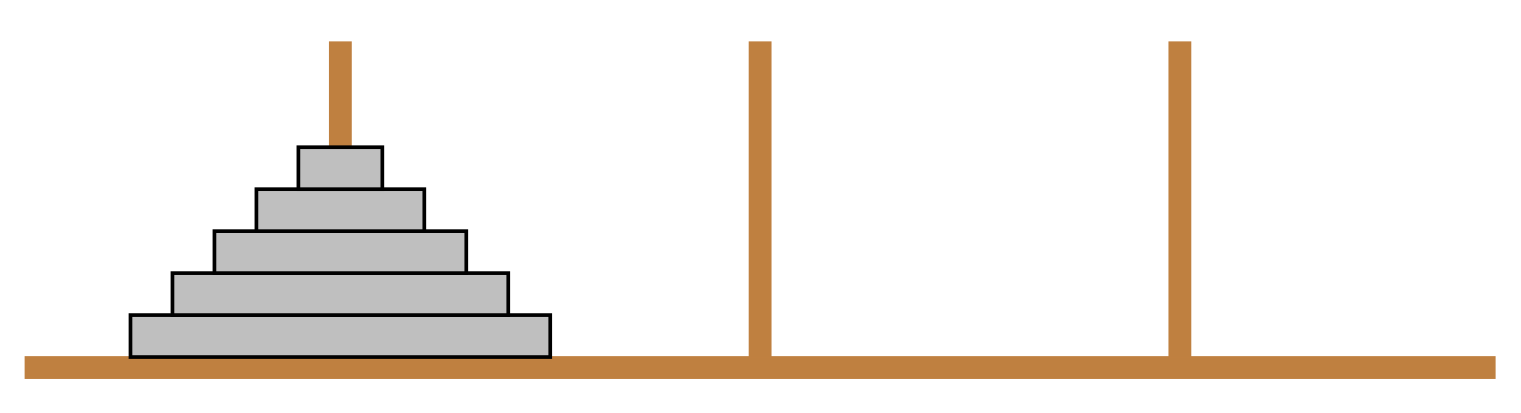 width=500></center>

$n$ disques sont posés sur la tige à gauche. L'objectif est de déplacer tous les disques sur la tige à droite :

<center><img src=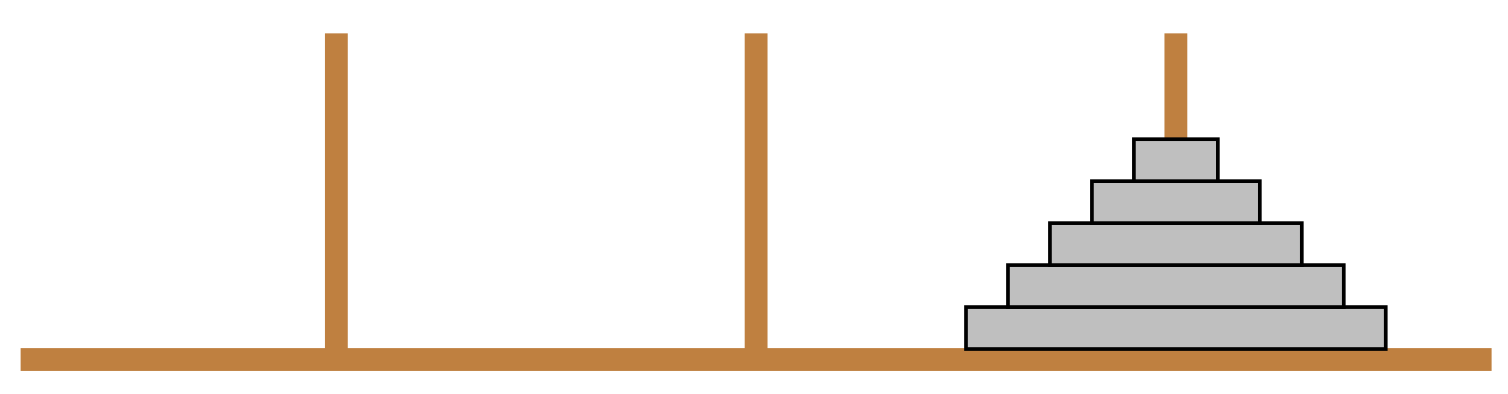 width=500></center>

Règles du jeu :

- On ne peut déplacer qu'un disque à la fois (celui tout en haut), sur une autre tige.
- Il est interdit de poser un disque sur un autre plus petit.

Exemple de premier déplacement valide :

<center><img src=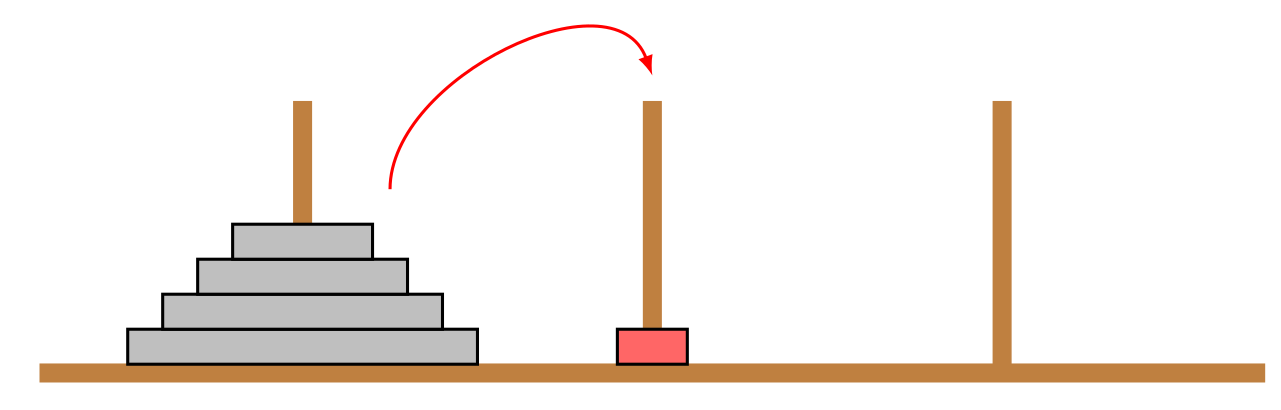 width=500></center>

On souhaite écrire une fonction récursive `hanoi` telle que `hanoi n tige1 tige2` affiche une suite de déplacements (avec des `print_int`) permettant de déplacer $n$ disques depuis `tige1` vers `tige2`. On supposera que les tiges sont numérotées 0, 1, 2 (de gauche à droite).

1. Supposons que vous sachiez déplacer $n-1$ disques d'une tige à une autre. Comment déplacer $n$ disques d'une tige à une autre ?
2. Écrire `hanoi`.  
Pour afficher les déplacements on pourra utiliser `print_string`, `^` (pour concaténer 2 chaînes de caractères), `\n` (pour un saut de ligne) et `print_newline ()` à la fin pour tout afficher.

1. Pour déplacer $n$ disques de la tige 0 à la tige 2 :
- On déplace récursivement $n - 1$ disques de 0 vers 1.
- On déplace 1 disque (le plus gros) de 0 vers 2.
- On déplace récursivement $n - 1$ disques de 1 vers 2.
<center><img src=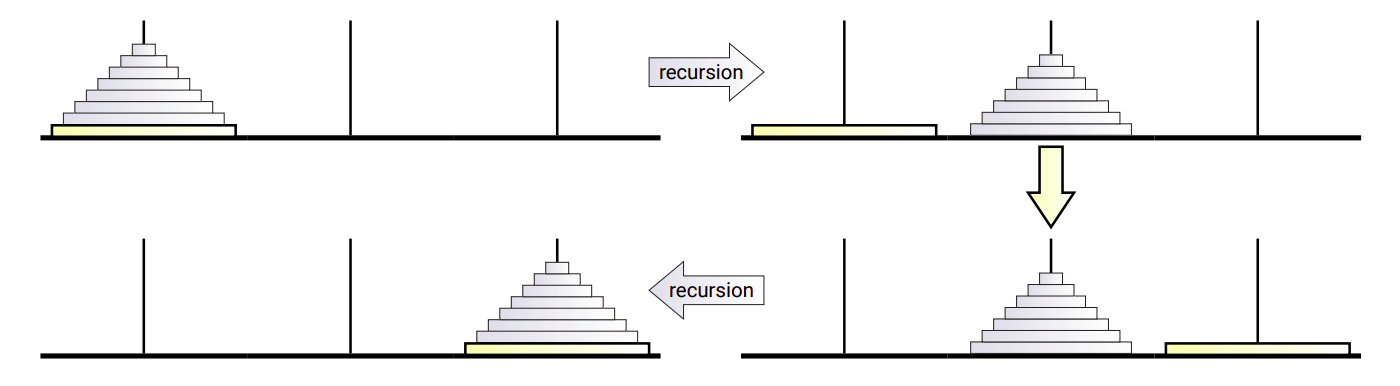 width=800></center>

In [8]:
(* 2 *)
let rec hanoi n tige1 tige2 =
  if n = 0 then () (* aucun déplacement à faire *)
  else (let tige_intermediaire = 3 - tige1 - tige2 in (* on utilise le fait que la somme des 3 tiges vaut 3 *)
        hanoi (n - 1) tige1 tige_intermediaire;
        print_string ((string_of_int tige1)^" -> "^(string_of_int tige2)^"\n");
        hanoi (n - 1) tige_intermediaire tige2) in
hanoi 3 0 2;
print_newline ();;

0 -> 2
0 -> 1
2 -> 1
0 -> 2
1 -> 0
1 -> 2
0 -> 2



- : unit = ()
